In [8]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 88.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
Note: you may need to restart the kernel to use updated packages.


### 1. Importância da Visualização de Dados:
Explique a importância da visualização de dados no contexto de uma pandemia como a COVID-19. Como essas visualizações podem ajudar gestores de saúde pública e a população em geral a tomar decisões informadas?

### 2.Gráfico de Barras com Streamlit:
Usando os dados de casos novos de COVID-19 por semana epidemiológica de notificação, crie um gráfico de barras em Streamlit que mostre a evolução semanal dos casos em um determinado estado. Indique o estado escolhido e explique sua escolha.

streamlit run main_atv2.py --server.port=8501 --browser.serverAddress='74.249.85.195'

In [37]:
%%writefile main_atv2.py

import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

df = pd.read_csv(r'/workspaces/STR_TP2/Dados/HIST_PAINEL_COVIDBR_2024_Parte2_24ago2024.csv', delimiter=';', encoding='UTF-8')
df['data'] = pd.to_datetime(df['data'])
df['mes'] = df['data'].dt.to_period('M').astype(str)
df_plot = df.groupby('mes')['casosNovos'].sum().reset_index()

st.write('### Casos Novos de COVID-19 no RJ por Mês')
st.write('Selecionado o estado do RJ por ser o meu local de residência')

plt.figure(figsize=(6, 4))
sns.barplot(x = df_plot['mes'], y = df_plot['casosNovos'])
plt.xticks(rotation=45)
st.pyplot(plt)

Overwriting main_atv2.py


### 3.Gráfico de Linha com Streamlit:
Crie um gráfico de linha utilizando Streamlit para representar o número de óbitos acumulados por COVID-19 ao longo das semanas epidemiológicas de notificação para todo o Brasil. Explique como a curva de óbitos acumulados pode ser interpretada.

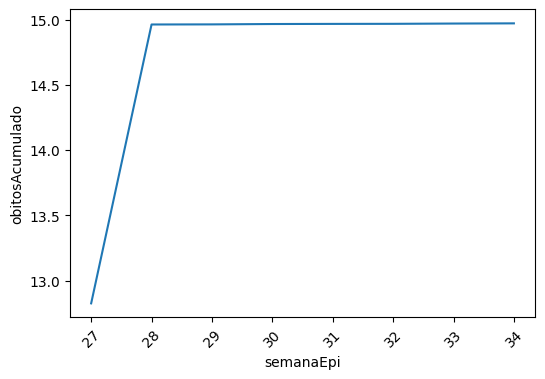

In [28]:
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

df = pd.read_csv(r'/workspaces/STR_TP2/Dados/HIST_PAINEL_COVIDBR_2024_Parte2_24ago2024.csv', delimiter=';', encoding='UTF-8')
df_plot = df.groupby('semanaEpi')['obitosAcumulado'].sum().reset_index()
df_plot['obitosAcumulado'] = df_plot['obitosAcumulado'] / 1000000

st.write('### Óbitos por COVID-19 por Semana Epidemológica')
st.write('#Valores acumulados desde xx/xx. Unidade de medida em Milhões')

plt.figure(figsize=(6, 4))
sns.lineplot(x = df_plot['semanaEpi'], y = df_plot['obitosAcumulado'])
plt.xticks(rotation=45)
plt.show()

### 4.Gráfico de Área com Streamlit:
Utilizando os dados de casos acumulados por COVID-19, crie um gráfico de área em Streamlit para comparar a evolução dos casos em três estados diferentes. Explique as diferenças observadas entre os estados escolhidos.

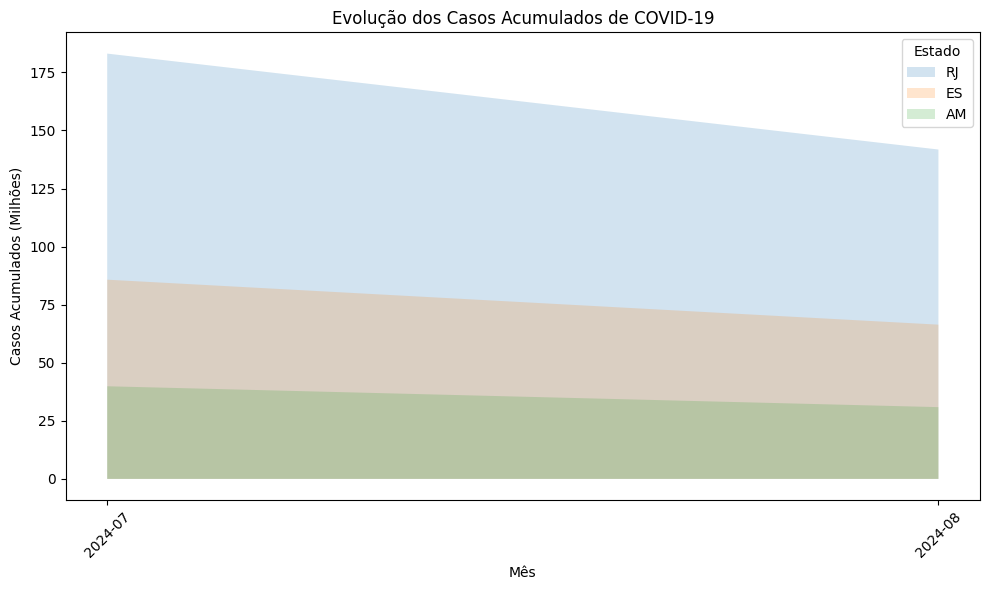

In [70]:
df_plot = df.groupby(['mes','estado'])['casosAcumulado'].sum().reset_index()
df_plot['casosAcumulado'] = df_plot['casosAcumulado'] / 1000000
estados = ['RJ','ES','AM']
df_plot = df_plot[df_plot['estado'].isin(estados)]

st.write('### Casos Acumulados de COVID-19 por Mês')
st.write('Comparativo entre RJ, ES e AM')
st.write('Se observa que XXX')

plt.figure(figsize=(10, 6))
for estado in estados:
    estado_data = df_plot[df_plot['estado'] == estado]
    plt.fill_between(estado_data['mes'].astype(str), estado_data['casosAcumulado'], label=estado, alpha=0.2)

plt.xticks(rotation=45)
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

### 5.Mapa com Streamlit:
Crie um mapa interativo utilizando a função st.map do Streamlit que mostre a distribuição dos casos acumulados de COVID-19 por município em um estado específico. Explique como esse tipo de visualização pode ajudar na análise geográfica da pandemia.

### 6.Visualização com Matplotlib:
Utilize a biblioteca Matplotlib para criar um gráfico de barras que mostre a comparação entre os casos novos e os óbitos novos de COVID-19 por estado na semana epidemiológica mais recente disponível. Explique o que os dados sugerem sobre a relação entre casos e óbitos.

### 7.Boxplot com Seaborn:
Usando a biblioteca Seaborn, crie um boxplot que compare a distribuição dos casos novos de COVID-19 por semana epidemiológica entre três regiões do Brasil (Norte, Nordeste, Sudeste). Explique as principais diferenças observadas.

### 8.Gráfico de Área com Altair:
Crie um gráfico de área em Altair para mostrar a evolução dos casos novos de COVID-19 por semana epidemiológica de notificação em uma determinada região do Brasil. Explique a escolha da região e as tendências observadas nos dados.

### 9.Heatmap com Altair:
Desenvolva um heatmap em Altair que mostre a correlação entre casos novos, óbitos novos e leitos hospitalares ocupados (caso os dados estejam disponíveis) em um determinado estado. Explique as possíveis correlações observadas.

### 10.Gráfico de Pizza com Plotly:
Usando Plotly, crie um gráfico de pizza (pie chart) que mostre a distribuição percentual dos casos acumulados de COVID-19 entre as cinco regiões do Brasil. Explique o que os dados revelam sobre a distribuição geográfica dos casos.

### 11.Subplots com Plotly:
Crie subplots em Plotly que mostrem, lado a lado, gráficos de barras comparando os casos novos e os óbitos novos de COVID-19 por semana epidemiológica em duas diferentes regiões do Brasil. Explique as diferenças observadas entre as regiões.

### 12.Mapa Interativo com PyDeck:
Utilize PyDeck para criar um mapa interativo que mostre a densidade populacional ajustada para os casos acumulados de COVID-19 por município em uma determinada região do Brasil. Explique como a densidade populacional pode influenciar a disseminação da COVID-19.